# Undrained strength gain due to linear-constant construction rate
This noteboox explains how this is performed
## This is a headline2
### This is a headline3
#### This is headline4
##<p align="justify">
During preliminary design of MSE berm, Geosyntec identified sections where the short-term
factor of safety was lower than 1.25 using the initial shear strength (Suo) provided by Golder
[2019a]. For these cases, back-calculation limit equilibrium analyses were performed to
determine the required undrained shear strength (Su-req) that leads a minimum FS of 1.25. These
analyses were followed by the calculation of the maximum allowable construction rate that
renders to the strength increment requirements.
#</p>


## INPUTS

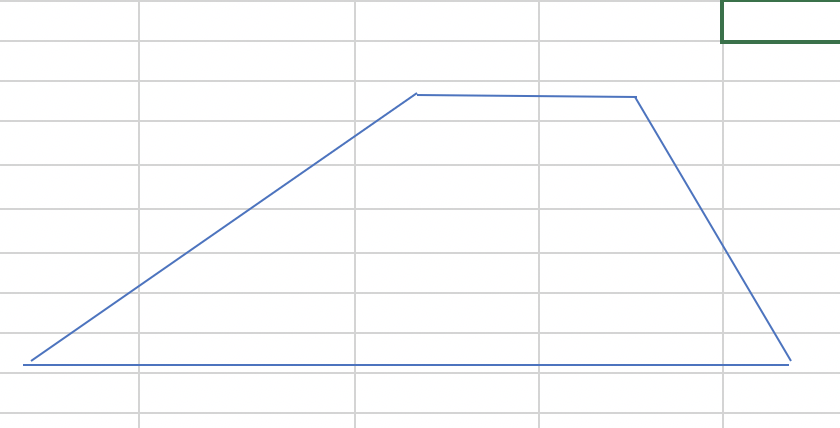

In [78]:
from IPython.display import Image
Image(filename="Berm1.png", width=300, height=300)

### Berm Properties

In [79]:
Hb = float(input("Berm Height (ft):"))
gammab = float(input("Unit Weight (pcf):"))
zH = 1

Berm Height (ft):96
Unit Weight (pcf):128


### Soil Properties

In [91]:
phi = float(input("Fricion angle (deg):"))
su_o = float(input("Initial undrained shear strength (psf):"))
Su_r = float(input("Undrained shear strength required (psf):"))
cv = float(input("Coefficient of consolidation (ft^2/day):"))
Hd = float(input("Drainage height (ft):"))
tanphi = math.tan(math.radians(phi))

Fricion angle (deg):23
Initial undrained shear strength (psf):650
Undrained shear strength required (psf):1500
Coefficient of consolidation (ft^2/day):0.47
Drainage height (ft):11


### Construction conditions

In [84]:
r = float (input("Estimated Construction rate (ft-height/day):"))
to = Hb/r
To = cv*to/(pow(Hd,2))
To=round(To,3)
print("time factor:",To)


Estimated Construction rate (ft-height/day):2.4
time factor: 0.155


\begin{align*}
(a+b)^2 = a^2+2ab+b^2  
\end{align*} 



In [86]:
for i in numbers:
    if i < To :
        uz_uo=1-0.5*(pow(zH,2))
print (uz_uo)

0.5


In [92]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plot
import math

###############################################################################
####################### data uuo for T and for T-To############################
###############################################################################
# Create the dataframe with initial T and upuo based on z/H=1
dfr = pd.DataFrame({'Tf': [0.0010,0.0015,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100,0.0150,0.0200,0.0300,0.0400,0.0500,0.0600,0.0700,0.0800,0.0900,0.1000,0.1100,0.1200,0.1300,0.1400,0.1500,0.1600,0.1700,0.1800,0.1900,0.2000,0.2100,0.2200,0.2400,0.2600,0.2800,0.3000,0.3200,0.3400,0.3600,0.3800,0.4000,0.4200,0.4500,0.4800,0.5000,0.5200,0.5500,0.5800,0.6000,0.6200,0.6500,0.6800,0.7000,0.7200,0.7500,0.7800,0.8000,0.8200,0.8500,0.8800,0.9000,0.9200,0.9500,0.9800,1.0000,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,3,4,5],
                   'upuo':[0.499,0.4985,0.498,0.497,0.496,0.495,0.494,0.493,0.492,0.491,0.49,0.485,0.48,0.47,0.46,0.45002,0.44007,0.43019,0.42038,0.41069,0.40119006,0.3907959,0.38136638,0.37129531,0.36369982,0.35571,0.34644202,0.33758054,0.33005945,0.32199072,0.31481,0.30639407,0.29823939,0.29112353,0.26998978,0.25742987,0.24612,0.23351178,0.22257579,0.21078866,0.20013759,0.19232,0.18308548,0.1694569,0.1574491,0.15027,0.14296043,0.1323933,0.12270163,0.11741,0.11134544,0.10340817,0.095973593,0.09174,0.086845399,0.080491752,0.07453055,0.07168,0.067855545,0.063139763,0.057154265,0.05601,0.052566939,0.04922512,0.045025909,0.04376,0.035977513,0.029583624,0.023621754,0.018523923,0.01274,0.010752971,0.00907677,0.00727792,0.005111123,0.00371,0.00031,0.00003,0]})
# Arrange the vector that starts from 0.001 and has a interval of 0.001
arr = np.arange(dfr.Tf.min(),dfr.Tf.max() + 0.001,0.001)
#   Convert the floats into a dataframe
df = pd.DataFrame({'Tf':arr}).merge(dfr, how='left')
AllT = df[['Tf']].copy() 

# Split data in training (not NaN values) and missing (NaN values)
missing = df.isna().any(axis=1)
df_training = df[~missing]
df_missing = df[missing].reset_index(drop=True)
# Create function that interpolate missing value (from our training values). inter1d is the function. df_training values are only the values that non NaN
f = interp1d(df_training.Tf, df_training.upuo)

# Interpolate the missing values. Use function f
#   This gets the missing values of the dataframe with values NaN, meaning from df_missing
AllT["upuo"] = f(AllT.Tf)
#print("Interpolated Table :\n", AllT)

# Add a column dataframe as a result of a math operation using one of the columns of a dataframe    
AllT['T_To'] = AllT['Tf']-To

vmax =AllT['T_To'].max()
vmax2 =int(AllT['Tf'].max())*1000
a=int(vmax2-vmax*1000)


# Filter only certain data from the dataframe based on a column
df_filtered = AllT[AllT['Tf'] < vmax+0.001 ]
ze = np.zeros(shape=(a,1))
# Create a list of values (this will be instered in a dataframe later)
listofTTo= df_filtered['upuo'].tolist()
#print("Only postive Tf-To:\n", df_filtered) 
# Filter values of certain dataframe to add a column in a new dataframe
# Create data that applies from o to To
TableT = AllT[AllT['T_To'] <= 0] 
# Create data that applies from To to inf
TableT_To = AllT[AllT['Tf'] > To]
#  Rename to organize values, T with uuoT and T-To with uuoT-To
TableT.rename(columns= { 'Tf':'T','T_To':'T-To','upuo':'upuoT'}, inplace=True)
TableT_To.rename(columns= {'Tf':'T', 'upuo':'upuoT','T_To':'T-To'}, inplace=True)
#del TableT['T_To']
TableT ['upuoT-To'] = ze
#  Add list of numbers selected a couple of code lines above
TableT_To ['upuoT-To'] = listofTTo


/Users/jennyramirez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jennyramirez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [94]:
###############################################################################
############################ Schiffmann (1958) ################################
###############################################################################

TableT ['To.u/uo'] = uzuo - TableT['upuoT'] 
TableT_To ['To.u/uo'] = TableT_To['upuoT-To'] - TableT_To['upuoT'] 

TableT ['u/uo'] = TableT['To.u/uo']/To
TableT_To ['u/uo'] = TableT_To['To.u/uo']/To

TableT ['t'] = TableT['T']*pow(Hd,2)/cv
TableT_To ['t'] = TableT_To['T']*pow(Hd,2)/cv

TableT ['H'] = TableT['t']*r
TableT_To ['H'] = TableT_To['t']*r

TableT ['DeltaSu'] = (TableT['H']*gammab-TableT['u/uo']*Hb*gammab*tanphi)*tanphi
TableT_To ['DeltaSu'] = (Hb*gammab-TableT_To['u/uo']*Hb*gammab*tanphi)*tanphi

TableT ['Su'] = (TableT['DeltaSu']+su_o)
TableT_To ['Su'] = (TableT_To['DeltaSu']+su_o)


AllTable = pd.concat([TableT, TableT_To])
print("Final table :\n", AllTable)


 

Final table :
           T         upuoT   T-To  upuoT-To   To.u/uo      u/uo            t  \
0     0.001  4.990000e-01 -0.154  0.000000  0.001000  0.006452     0.257447   
1     0.002  4.980000e-01 -0.153  0.000000  0.002000  0.012903     0.514894   
2     0.003  4.970000e-01 -0.152  0.000000  0.003000  0.019355     0.772340   
3     0.004  4.960000e-01 -0.151  0.000000  0.004000  0.025806     1.029787   
4     0.005  4.950000e-01 -0.150  0.000000  0.005000  0.032258     1.287234   
...     ...           ...    ...       ...       ...       ...          ...   
4995  4.996  1.200000e-07  4.841  0.000005  0.000005  0.000030  1286.204255   
4996  4.997  9.000000e-08  4.842  0.000005  0.000005  0.000030  1286.461702   
4997  4.998  6.000000e-08  4.843  0.000005  0.000005  0.000030  1286.719149   
4998  4.999  3.000000e-08  4.844  0.000005  0.000005  0.000030  1286.976596   
4999  5.000  0.000000e+00  4.845  0.000005  0.000005  0.000030  1287.234043   

                H      DeltaSu      

/Users/jennyramirez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jennyramirez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jennyramirez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<Figure size 432x288 with 0 Axes>

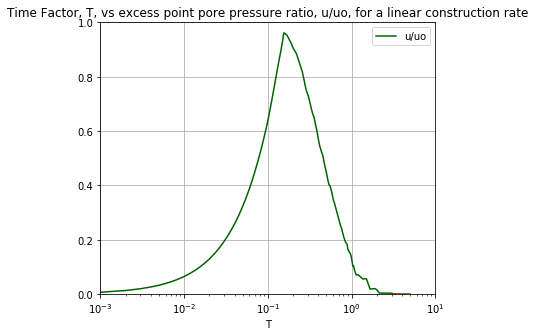

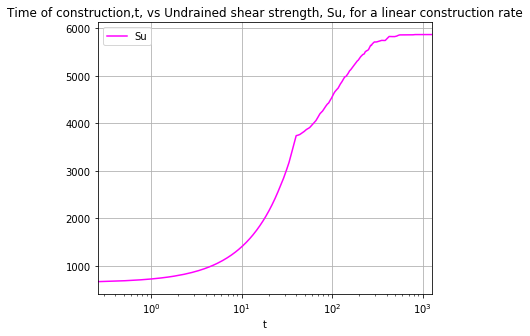

In [97]:

# Data for plotting
fig = plot.figure()
AllTable.plot(x='T', y='u/uo',kind='line', figsize=(6, 5),use_index = bool,title='Time Factor, T, vs excess point pore pressure ratio, u/uo, for a linear construction rate'
              ,logy=False, logx=True,ylim=[0,1],xlim=[0.001,10], grid = bool, color='DarkGreen') 

AllTable.plot(x='t', y='Su',kind='line', figsize=(6, 5),use_index = bool,title='Time of construction,t, vs Undrained shear strength, Su, for a linear construction rate'
              ,logy=False, logx=True, grid = bool, color='Magenta') 